C:\Users\rodri\AppData\Local\Temp\ipykernel_21800\2289269932.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rodri\AppData\Local\Temp\ipykernel_21800\2289269932.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


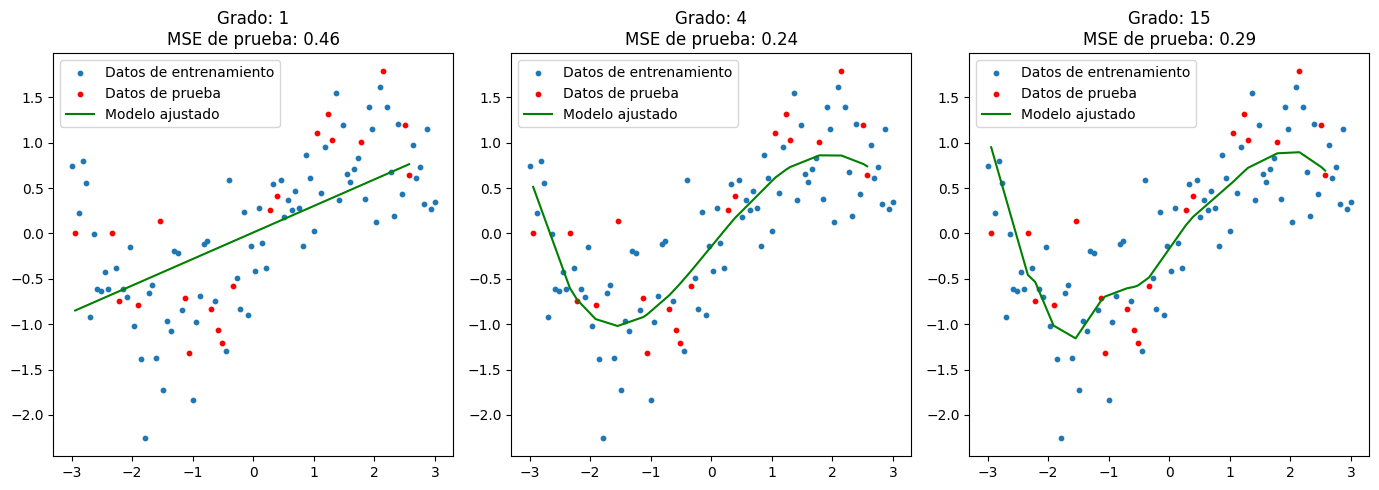

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Paso 1: Generar datos sintéticos
np.random.seed(0)  # Para reproducibilidad
x = np.linspace(-3, 3, 100)  # 100 puntos en el rango [-3, 3]
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)  # Función sinusoidal con ruido

# Dividir los datos en entrenamiento y prueba
indices = np.random.permutation(len(x))
x_train, x_test = x[indices[:80]], x[indices[80:]]
y_train, y_test = y[indices[:80]], y[indices[80:]]

# Paso 2: Ajustar modelos polinomiales de diferentes grados
grados = [1, 4, 15]  # Grados del polinomio a probar
plt.figure(figsize=(14, 5))

for i, grado in enumerate(grados):
    # Crear un modelo polinomial de grado 'grado'
    modelo = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
    
    # Entrenar el modelo
    modelo.fit(x_train[:, np.newaxis], y_train)
    
    # Predecir sobre el conjunto de entrenamiento y de prueba
    y_train_pred = modelo.predict(x_train[:, np.newaxis])
    y_test_pred = modelo.predict(x_test[:, np.newaxis])
    
    # Calcular el error cuadrático medio (MSE) en el conjunto de prueba
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Paso 3: Visualizar los ajustes
    plt.subplot(1, len(grados), i + 1)
    plt.tight_layout()
    plt.scatter(x_train, y_train, s=10, label="Datos de entrenamiento")
    plt.scatter(x_test, y_test, s=10, label="Datos de prueba", color="r")
    plt.plot(np.sort(x_test), modelo.predict(np.sort(x_test)[:, np.newaxis]), color="green", label="Modelo ajustado")
    plt.title(f"Grado: {grado}\nMSE de prueba: {mse_test:.2f}")
    plt.legend()

plt.show()


El modelo lineal puede ser demasiado simple (subajuste), el modelo de grado 4 puede proporcionar un buen equilibrio, y el modelo de grado 15 es probablemente demasiado complejo y tiende a sobreajustarse a los datos de entrenamiento, lo que lleva a un pobre rendimiento en los datos de prueba (sobreajuste).